# Clustering Countries using Unsupervised Machine Learning

#### Problem statement:


HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


### Data description

- Country: Name of the country
- Child_mort: Death of children under 5 years of age per 1000 live births
- Exports: Exports of goods and services per capita. Given as %age of the GDP per capita
- Health: Total health spending per capita. Given as %age of GDP per capita
- Imports: Imports of goods and services per capita. Given as %age of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- Life_expec: The average number of years a new born child would live if the current mortality patterns are to rem...
- Total_fer: The number of children that would be born to each woman if the current age-fertility rates remain th...
- Gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.


## EDA and Hypothesis testing


Building upon the initial Tableau visualizations, let's delve deeper into the data using Exploratory Data Analysis (EDA) and hypothesis testing techniques. This will provide insights beyond basic trends and help us understand the factors influencing which countries require the most aid.

#### Suggestions for EDA
##### Data Cleaning and Outlier Handling:
- Missing Value Analysis: Identify missing values across all features. For numerical data like Income or Exports, consider imputation using techniques like mean/median filling or k-Nearest Neighbors (kNN). For textual data in project descriptions, explore text augmentation techniques to generate similar content and fill in missing information.
- Outlier Detection: Analyze features like Child_mortality, Income, and Gdpp (GDP per capita) for potential outliers. Utilize techniques like Interquartile Range (IQR) to identify data points that fall outside the range of 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3). Apply winsorization to cap outliers to the nearest non-outlier values instead of outright removal, preserving valuable data points.
##### Univariate Analysis:
- Focus on Distributions: Go beyond basic histograms for Child_mortality, Income, and Life_expec. Explore box plots to identify potential skewness or outliers. Consider kernel density estimation (KDE) plots to visualize the underlying distribution of continuous variables.
- Categorical Variables: Analyze the distribution of categorical variables like Country using bar charts or pie charts. Identify the most and least represented countries to understand the geographical scope of the data.
##### Bivariate Analysis:
- Correlations: Calculate the correlation matrix to assess linear relationships between all numerical features. Look for strong positive or negative correlations that might indicate dependencies between factors like Health spending and Life_expec.
- Explore scatter plots to visualize these relationships and identify potential outliers that might skew the correlation coefficient.

#### Suggestions for Hypothesis Testing
##### Health Spending and Life Expectancy:
- Hypothesis: Increased health spending (% of GDP) leads to higher life expectancy (Life_expec).
- Test: Conduct a t-test to compare the mean life expectancy of countries with high health spending versus those with low spending. This will provide statistical evidence for the association between these factors.
##### Fertility and Development:
- Hypothesis: Countries with higher Total_fertility rates have lower Income per person. (Correlation analysis and t-test)
##### Income and Child Mortality:
- Hypothesis: Higher income levels are associated with lower child mortality rates.
- Test: Perform a correlation analysis (Pearson or Spearman) to determine the strength and direction of the relationship between income and child mortality rates. Additionally, conduct a t-test to compare the mean child mortality rates between countries with high income and low income.
##### Inflation and Economic Stability:
- Hypothesis: Higher inflation rates are associated with lower GDP per capita, indicating economic instability.
- Test: Perform a correlation analysis to examine the relationship between inflation and GDP per capita. Additionally, conduct a t-test to compare the mean GDP per capita between countries with high inflation and low inflation.


## Importing libraries:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [2]:
!gdown 1IRQWbO9m-c93XjDsbtt2nqv5RVldVPzj

Downloading...
From: https://drive.google.com/uc?id=1IRQWbO9m-c93XjDsbtt2nqv5RVldVPzj
To: /content/Country-data.csv
100% 9.23k/9.23k [00:00<00:00, 23.7MB/s]


In [3]:
df = pd.read_csv("Country-data.csv",\
                        index_col='country')
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.tail()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [5]:
df.shape

(167, 9)

In [6]:
df.dtypes

,0
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


In [7]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')



The dataset includes **9 features with information on 167 countries**.
Features are as follows:
* child_mort: death of children under 5 years of age per 1,000 live births
* exports: exports of goods and services per capita. Given as % of the GDP per capita.
* health: total health-related spending per capita. Given as % of GDP per capita.
* imports: imports of goods and services per capita. Given as % of the GDP per capita.
* income: net income per person.
* Inflation: rate of increase in prices and fall in the purchasing value of money.
* life_expec: the average number of years a new born child would live if the current mortality patterns are to remain the same.
* total_fer: the number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp: the GDP per capita in USD (GDP divided by the total population).  



In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


After checking general dataset stats, we can confirm the dataset contain valid data:
+ Average life expectancy: 70.5 years
+ Average child mortality rate (per 1,000 live births): 38.3
+ Average fertility rate: 2.9
* Median fertility rate: 2.4
+ Average GDP per capita: 12,964 USD
* Average Income: 17,145 USD

###  Data Cleaning <a name=cleaning></a>

In [9]:
# Looking for duplicates
print('Number of duplicate observations in the dataset:', df.duplicated().sum())

Number of duplicate observations in the dataset: 0


In [10]:
# Looking for missing values
for col in df.columns:
    print('{} - missing Values: {}'.format(col, df[col].isnull().sum()))

child_mort - missing Values: 0
exports - missing Values: 0
health - missing Values: 0
imports - missing Values: 0
income - missing Values: 0
inflation - missing Values: 0
life_expec - missing Values: 0
total_fer - missing Values: 0
gdpp - missing Values: 0


In [11]:
# Looking for outliers
def outlier_visualizer(col, vert=True, grid=True):

    (df[col].plot(kind='box',vert=vert))
    plt.title('{} - Boxplot'.format(col))
    plt.ylabel('Values')
    plt.grid(grid)
    plt.show()

def outlier_finder(col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    left_lim = q1 - iqr*1.5
    right_lim = q3 + iqr*1.5
    outliers = {'country':[], col:[]}

    for i,c in enumerate(df[col]):
        if c < left_lim:
            outliers['country'].append(df[col].index[i])
            outliers[col].append(c)
        elif c > right_lim:
            outliers['country'].append(df[col].index[i])
            outliers[col].append(c)

    outliers_df = pd.DataFrame(outliers)
    outliers_df.set_index('country', inplace=True)

    print('{} - % of outliers: {}%'.format(col, round(outliers_df.shape[0]/df.shape[0]*100,2)))
    return outliers_df

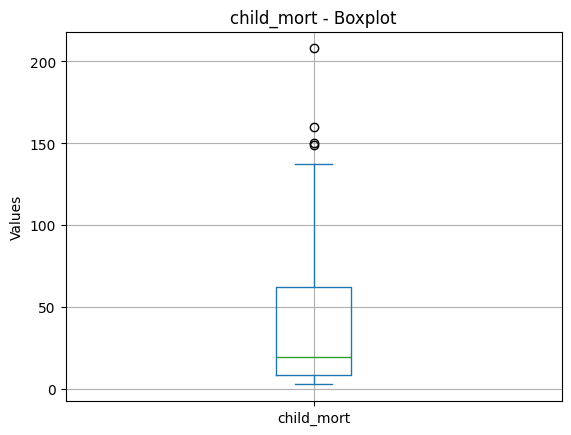

In [12]:
outlier_visualizer('child_mort')

In [13]:
outlier_finder('child_mort')

child_mort - % of outliers: 2.4%


,child_mort
country,
Central African Republic,149.0
Chad,150.0
Haiti,208.0
Sierra Leone,160.0


child_mort outliers seem to be correct observations.

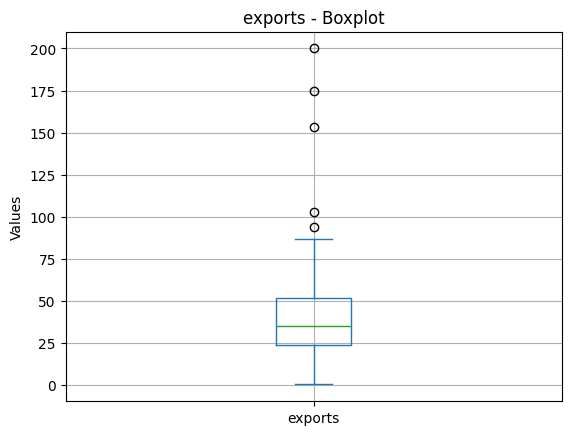

In [14]:
outlier_visualizer('exports')

In [15]:
outlier_finder('exports')

exports - % of outliers: 2.99%


,exports
country,
Ireland,103.0
Luxembourg,175.0
Malta,153.0
Seychelles,93.8
Singapore,200.0


exports outliers, after cross checking the export rate of those countries (as % of the GDP per capita) on the Internet, seem to be correct observations.

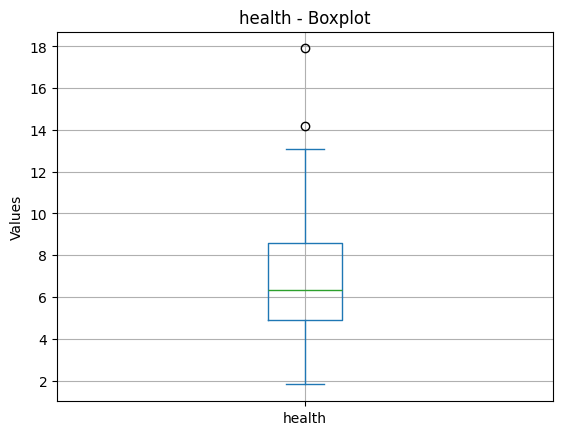

In [16]:
outlier_visualizer('health')

In [17]:
outlier_finder('health')

health - % of outliers: 1.2%


,health
country,
"Micronesia, Fed. Sts.",14.2
United States,17.9


health outliers, after cross checking the export rate of those countries (as % of the GDP per capita) on the Internet, seem to be correct observations.

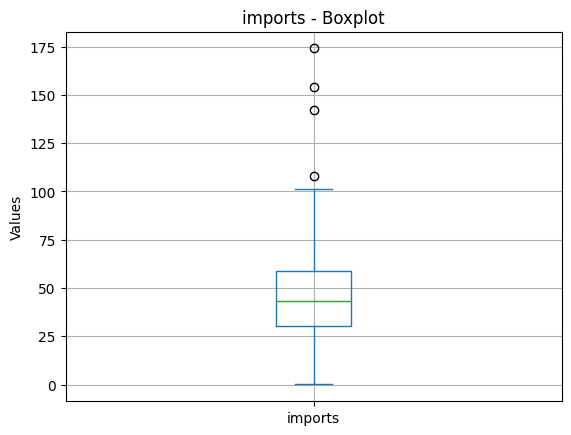

In [18]:
outlier_visualizer('imports')

In [19]:
outlier_finder('imports')

imports - % of outliers: 2.4%


,imports
country,
Luxembourg,142.0
Malta,154.0
Seychelles,108.0
Singapore,174.0


imports outliers, after cross checking the export rate of those countries (as % of the GDP per capita) on the Internet, seem to be correct observations.

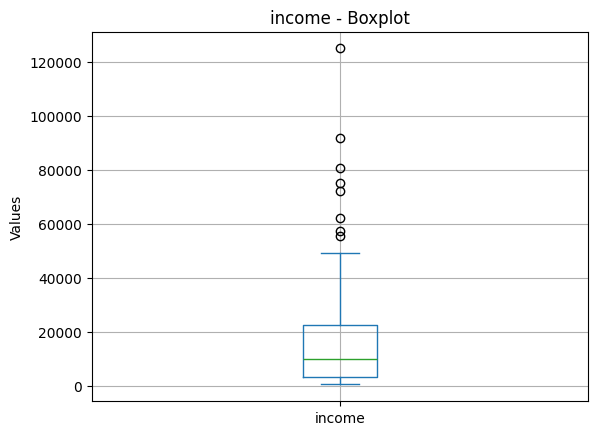

In [20]:
outlier_visualizer('income')

In [21]:
outlier_finder('income')

income - % of outliers: 4.79%


,income
country,
Brunei,80600
Kuwait,75200
Luxembourg,91700
Norway,62300
Qatar,125000
Singapore,72100
Switzerland,55500
United Arab Emirates,57600


The 8 income outliers seem to be correct observations, considering that all these countries are very high-income nations.

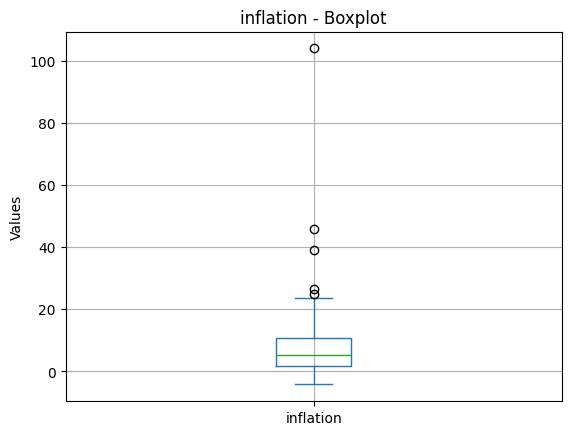

In [22]:
outlier_visualizer('inflation')

In [23]:
outlier_finder('inflation')

inflation - % of outliers: 2.99%


,inflation
country,
Equatorial Guinea,24.9
Mongolia,39.2
Nigeria,104.0
Timor-Leste,26.5
Venezuela,45.9


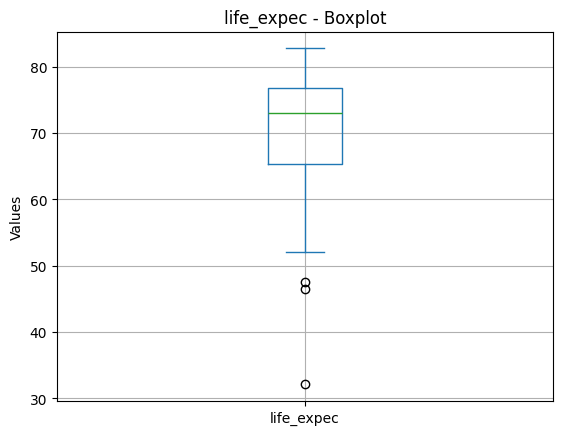

In [24]:
outlier_visualizer('life_expec')

In [25]:
outlier_finder('life_expec')

life_expec - % of outliers: 1.8%


,life_expec
country,
Central African Republic,47.5
Haiti,32.1
Lesotho,46.5


life_expec outliers seem to be correct observations.

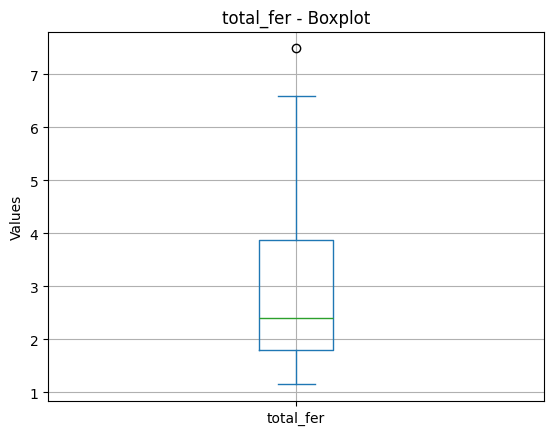

In [26]:
outlier_visualizer('total_fer')

In [27]:
outlier_finder('total_fer')

total_fer - % of outliers: 0.6%


,total_fer
country,
Niger,7.49


Niger, the only outlier in this attribute, seems to be a correct observation (I checked the fertility rate of the country on the Internet)

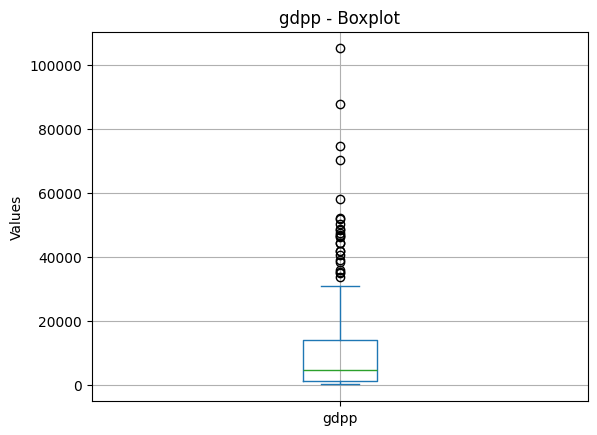

In [28]:
outlier_visualizer('gdpp')

In [29]:
outlier_finder('gdpp')

gdpp - % of outliers: 14.97%


,gdpp
country,
Australia,51900
Austria,46900
Belgium,44400
Brunei,35300
Canada,47400
Denmark,58000
Finland,46200
France,40600
Germany,41800


In [30]:
print('Numbers of gdpp outliers: ',len(outlier_finder('gdpp')))

gdpp - % of outliers: 14.97%
Numbers of gdpp outliers:  25


The 25 gdpp outliers are all 1st-world countries: we can  consider the observations as correct.

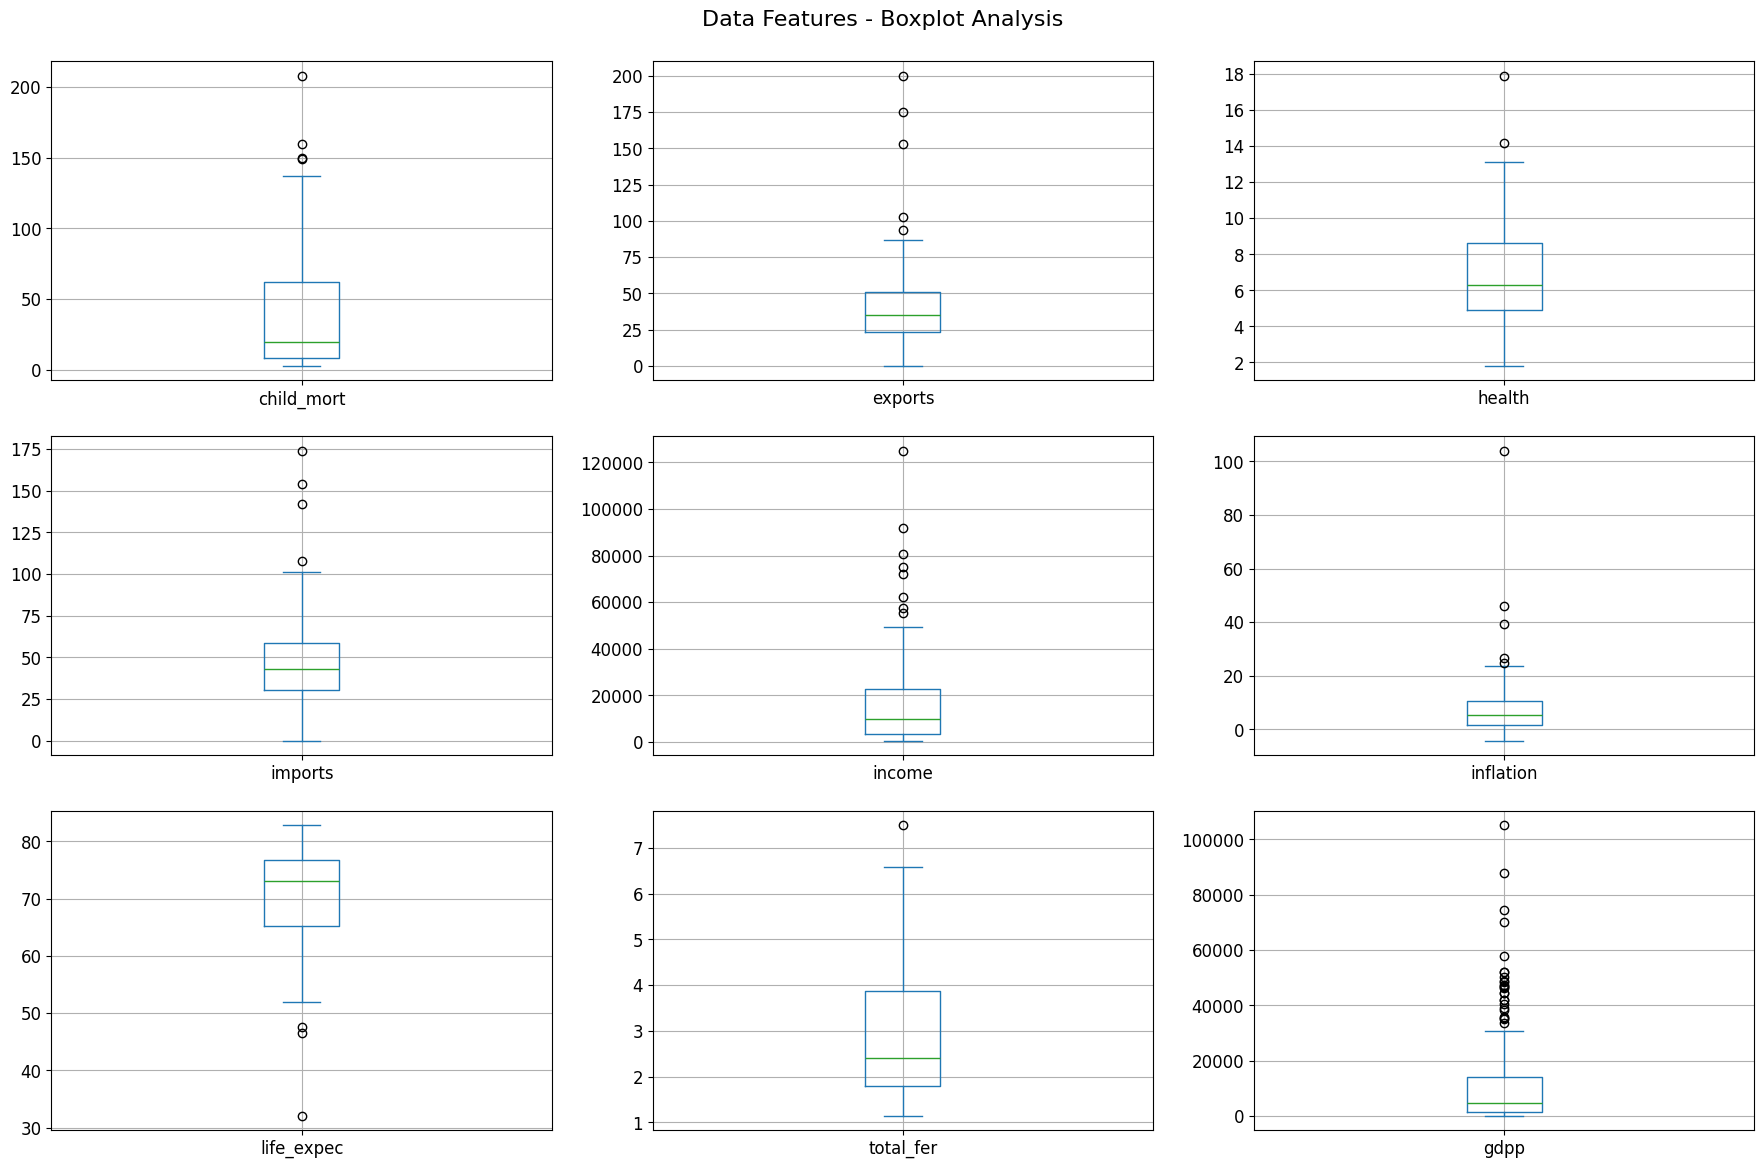

In [31]:
fig = plt.figure(figsize=(18,12))
child_mort = fig.add_subplot(3,3,1)
exports = fig.add_subplot(3,3,2)
health = fig.add_subplot(3,3,3)
imports = fig.add_subplot(3,3,4)
income = fig.add_subplot(3,3,5)
inflation = fig.add_subplot(3,3,6)
life_expec = fig.add_subplot(3,3,7)
total_fer = fig.add_subplot(3,3,8)
gdpp = fig.add_subplot(3,3,9)

df['child_mort'].plot(kind='box', fontsize=12, ax=child_mort)
child_mort.grid(True)
df['exports'].plot(kind='box', fontsize=12,ax=exports)
exports.grid(True)
df['health'].plot(kind='box', fontsize=12,ax=health)
health.grid(True)
df['imports'].plot(kind='box', fontsize=12,ax=imports)
imports.grid(True)
df['income'].plot(kind='box', fontsize=12,ax=income)
income.grid(True)
df['inflation'].plot(kind='box', fontsize=12,ax=inflation)
inflation.grid(True)
df['life_expec'].plot(kind='box', fontsize=12,ax=life_expec)
life_expec.grid(True)
df['total_fer'].plot(kind='box', fontsize=12,ax=total_fer)
total_fer.grid(True)
df['gdpp'].plot(kind='box', fontsize=12,ax=gdpp)
gdpp.grid(True)

fig.suptitle('Data Features - Boxplot Analysis', fontsize=16)
plt.tight_layout(pad=2)
plt.show()

### Exploratory Data Analysis <a name=eda></a>

In [32]:
df.describe(include='all')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Some variables are on a very different scale; before modelling, I'll normalize the data to bring all variables on the same scale to avoid the features with the highest scale to dominate the clustering algorithms.

Let's look into the distribution and feature correlation of our data.

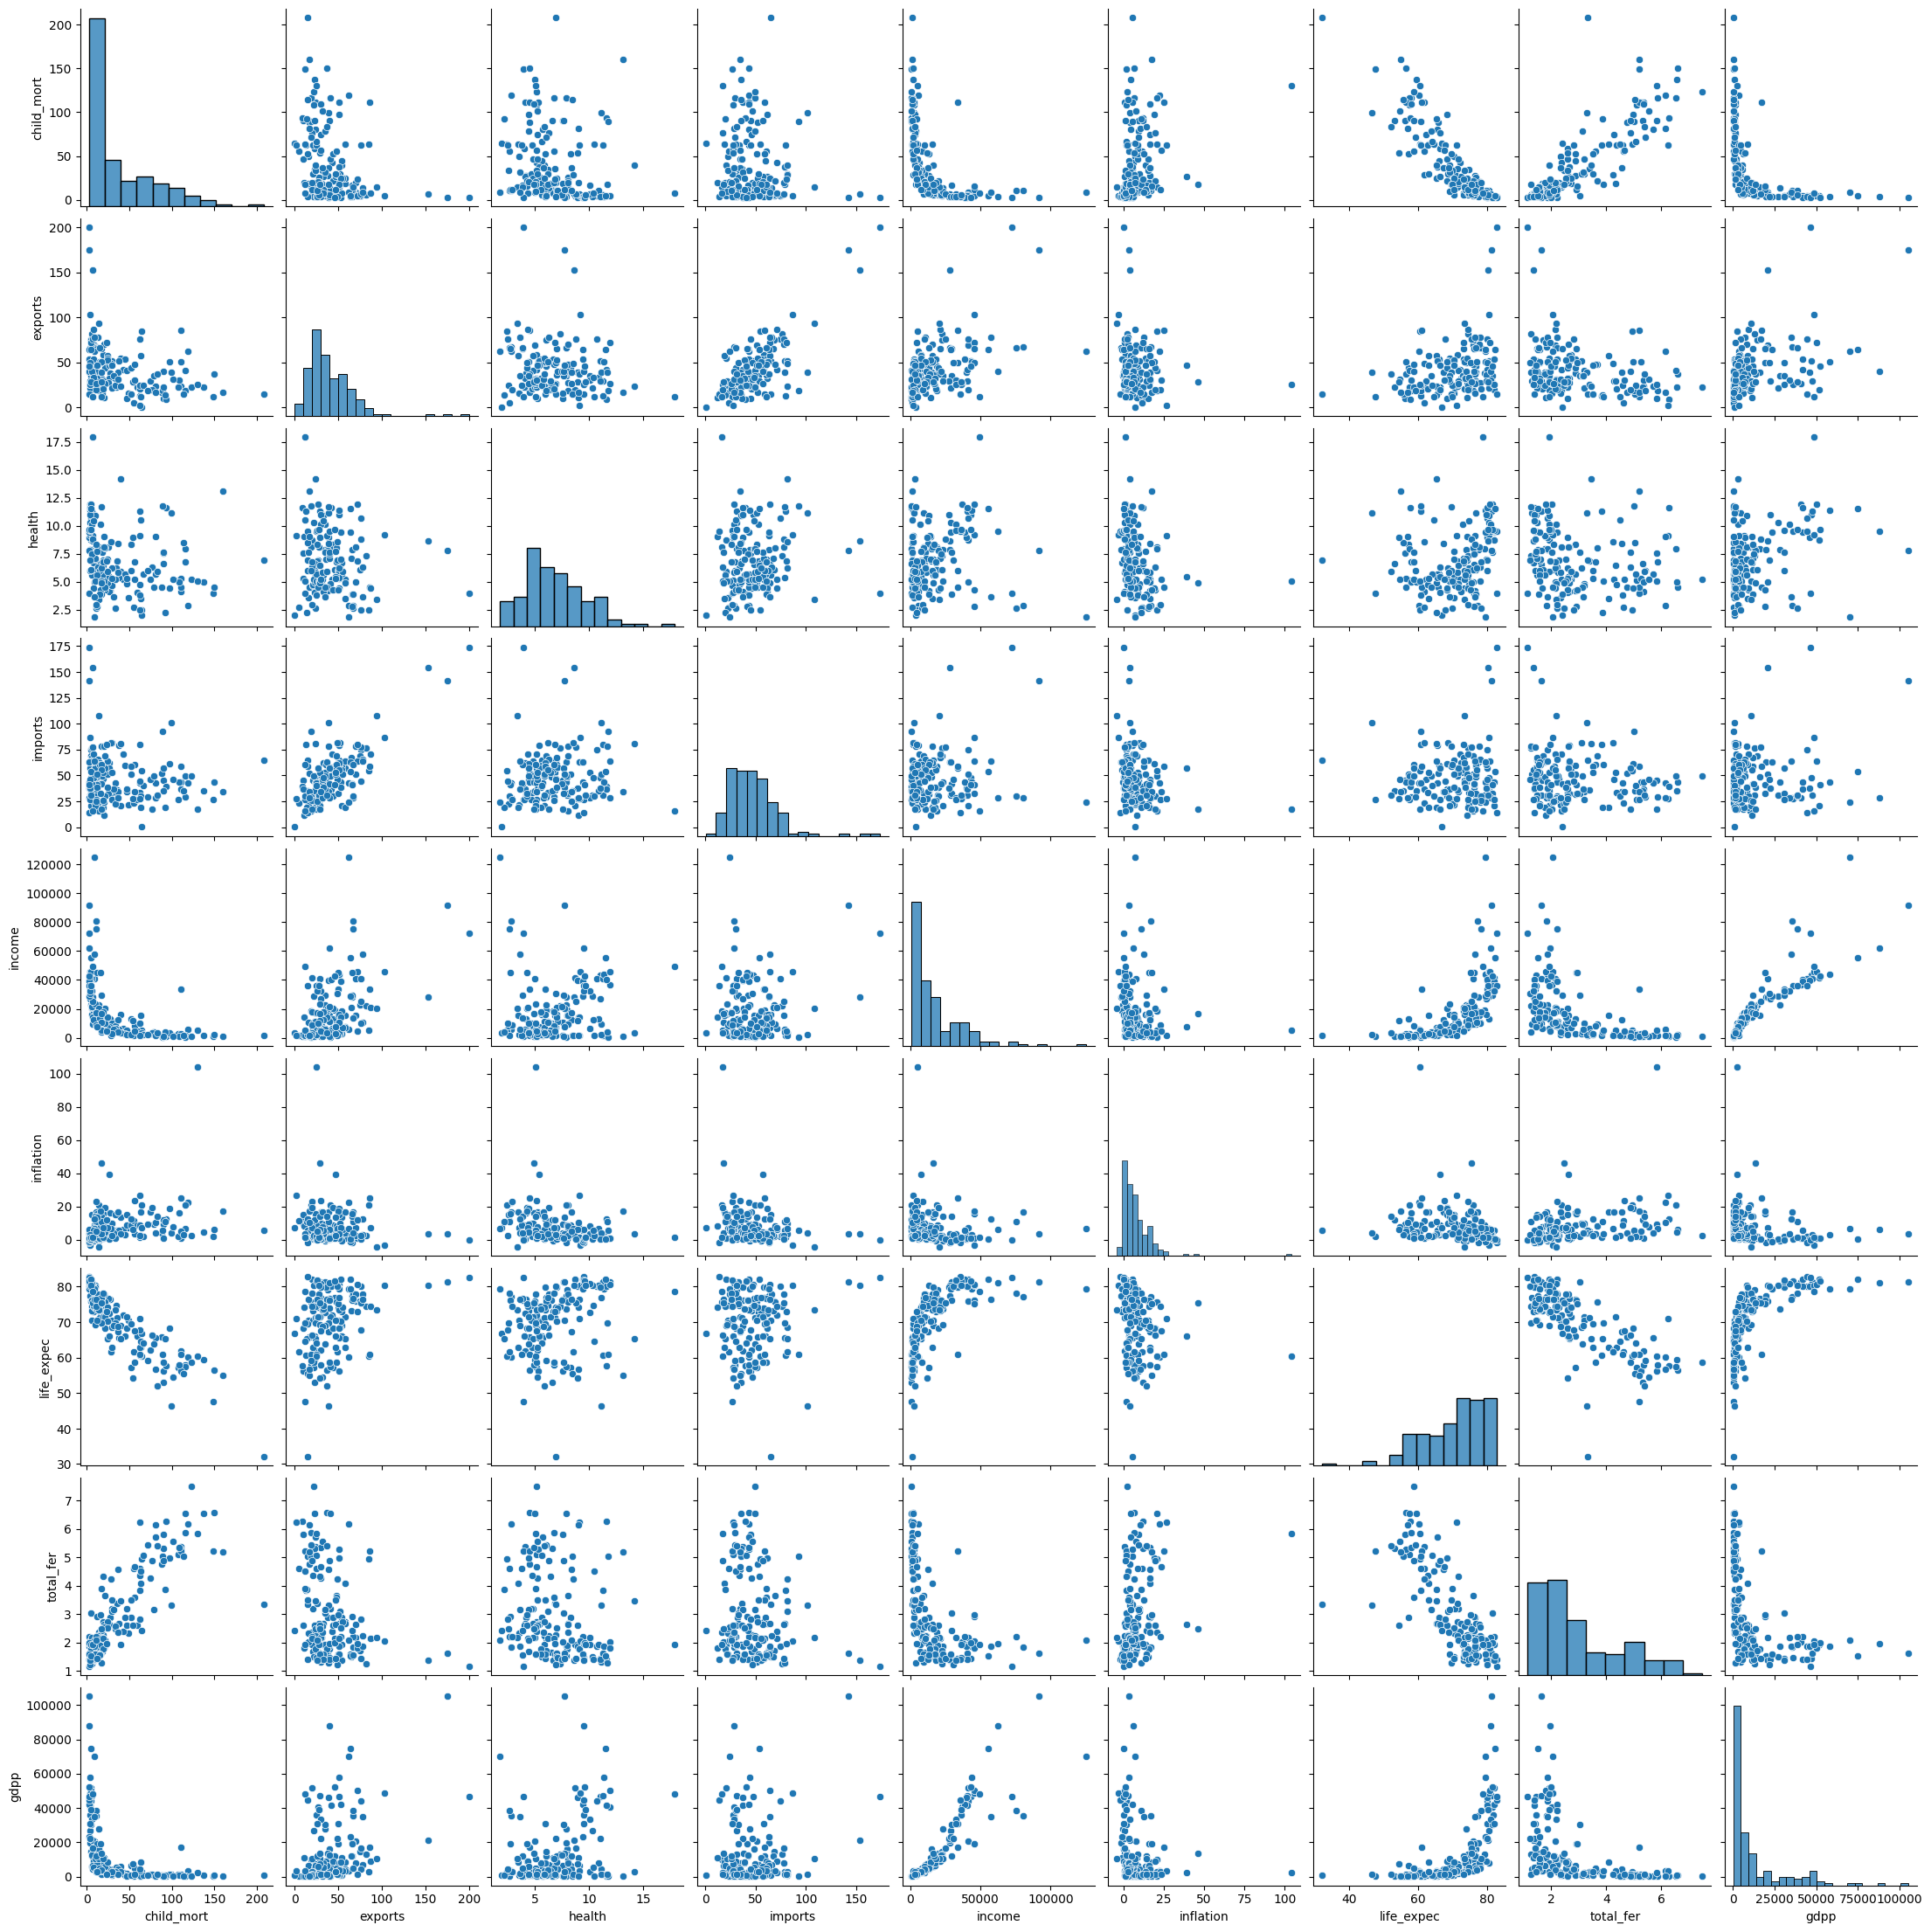

In [33]:
sns.pairplot(df)
plt.show()

##### Distribution
Some of the features seem to be quite right-skewed:
* child_mort
* exports
* imports
* income
* inflation
* total_fer
* gdpp

1 feature seem to be left-skewed:
* left_expec

The remaining features seem to have a more or less normal distribution:
* health

In [34]:
# let's check variable skewness
df.skew()

,0
child_mort,1.450774
exports,2.445824
health,0.705746
imports,1.905276
income,2.231480
inflation,5.154049
life_expec,-0.970996
total_fer,0.967092
gdpp,2.218051


In [35]:
def norm_check(data):
    for var in range(len(data.skew())):
        if abs(data.skew()[var]) > 0.75:
            print('"{}" skew: {}. The variable is NOT normally distributed.'.format(data.skew().index[var],
                                                                                    round(data.skew()[var],2)))
        else:
            print('"{}" skew: {}. The Variable is normally distributed'.format(data.skew().index[var],
                                                                                round(data.skew()[var],2)))

norm_check(df)

"child_mort" skew: 1.45. The variable is NOT normally distributed.
"exports" skew: 2.45. The variable is NOT normally distributed.
"health" skew: 0.71. The Variable is normally distributed
"imports" skew: 1.91. The variable is NOT normally distributed.
"income" skew: 2.23. The variable is NOT normally distributed.
"inflation" skew: 5.15. The variable is NOT normally distributed.
"life_expec" skew: -0.97. The variable is NOT normally distributed.
"total_fer" skew: 0.97. The variable is NOT normally distributed.
"gdpp" skew: 2.22. The variable is NOT normally distributed.


<ipython-input-35-86a05ffac494>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(data.skew()[var]) > 0.75:
<ipython-input-35-86a05ffac494>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  round(data.skew()[var],2)))
<ipython-input-35-86a05ffac494>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  round(data.skew()[var],2)))


##### Correlation
There seems to be a linear correlation (either positive or negative) between several features:
* child_mort and life_expec
* total_fer and child_mort
* exports and imports
* income and gdpp
* life_expec and total_fer

In [36]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [37]:
# I'll create a function to check which feature are lineraly correlated and what is the correlation coefficient
def corr_matrix(data):
    corr_matrix = data.corr()

    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x:x if abs(x) > 0.70 and abs(x) < 1 else '')

    return corr_matrix

In [38]:
corr_matrix(df)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,,,,,,,-0.886676,0.848478,
exports,,,,0.737381,,,,,
health,,,,,,,,,
imports,,0.737381,,,,,,,
income,,,,,,,,,0.895571
inflation,,,,,,,,,
life_expec,-0.886676,,,,,,,-0.760875,
total_fer,0.848478,,,,,,-0.760875,,
gdpp,,,,,0.895571,,,,


The only normally distributed variable is: health. The correlation matrix confirmed the results from the pairplots inspection.  
Let's apply several transformations to bring the data into the Gaussian distribution.

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-40-cfcf78456ade>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)


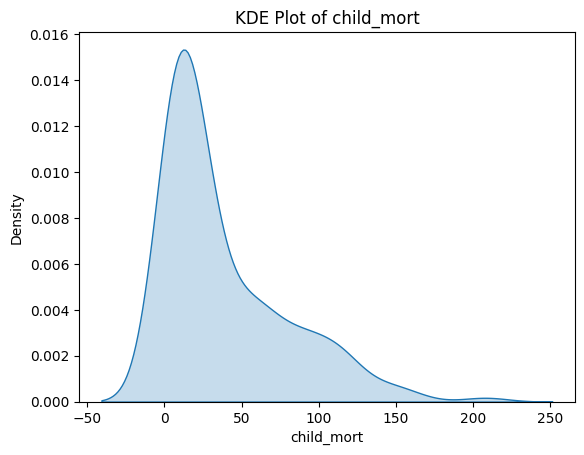

<ipython-input-40-cfcf78456ade>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)


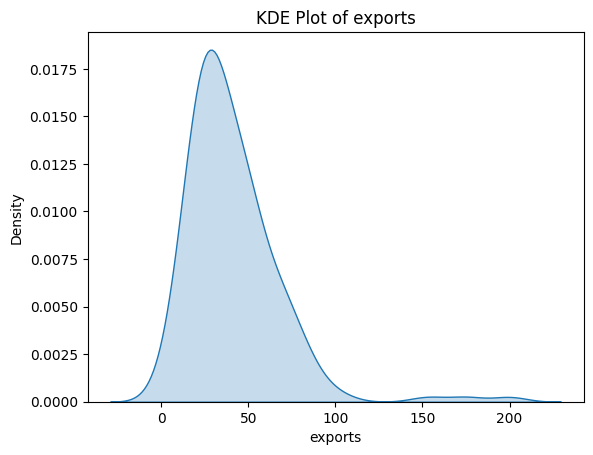

<ipython-input-40-cfcf78456ade>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)


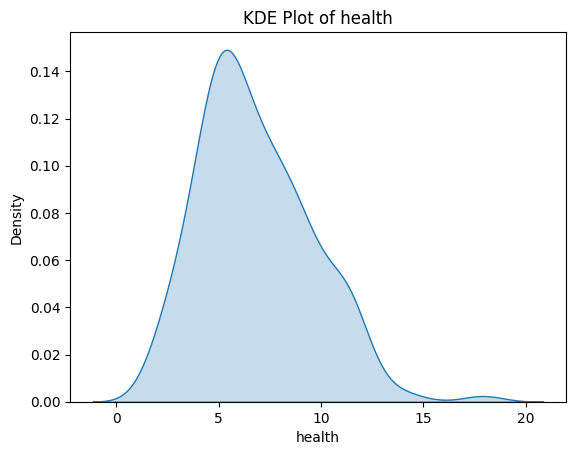

<ipython-input-40-cfcf78456ade>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)


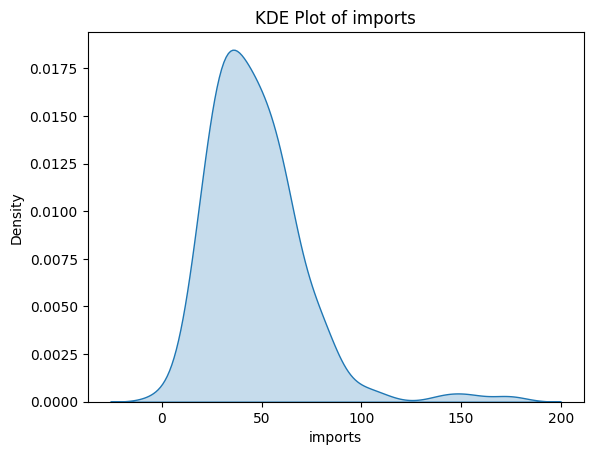

<ipython-input-40-cfcf78456ade>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)


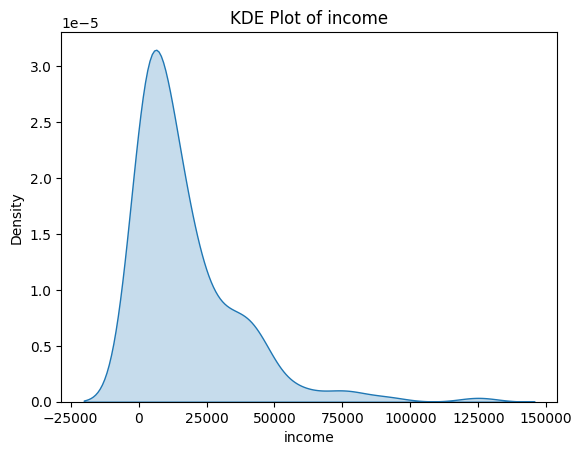

<ipython-input-40-cfcf78456ade>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)


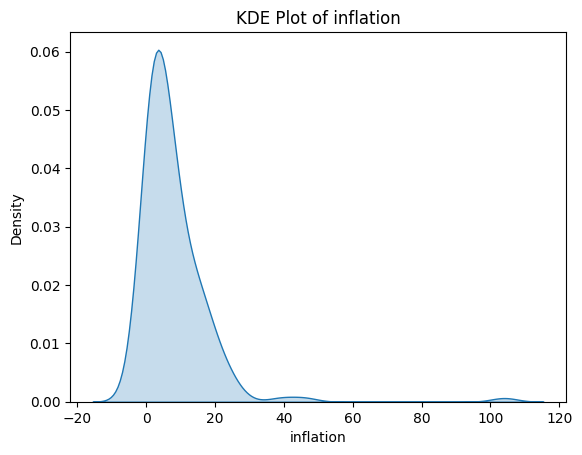

<ipython-input-40-cfcf78456ade>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)


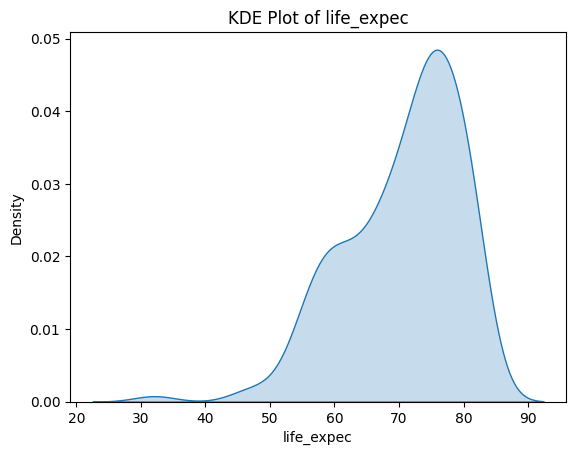

<ipython-input-40-cfcf78456ade>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)


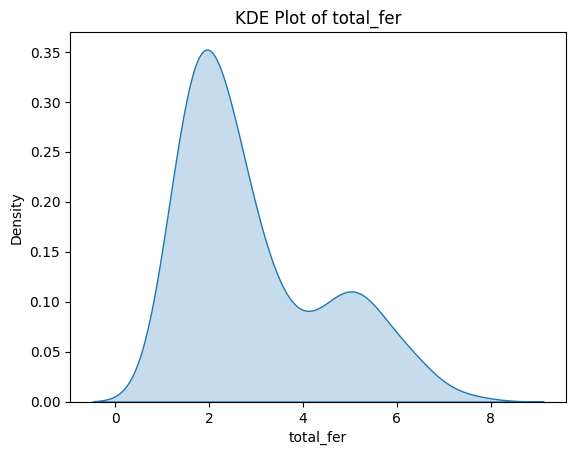

<ipython-input-40-cfcf78456ade>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[var], shade=True)


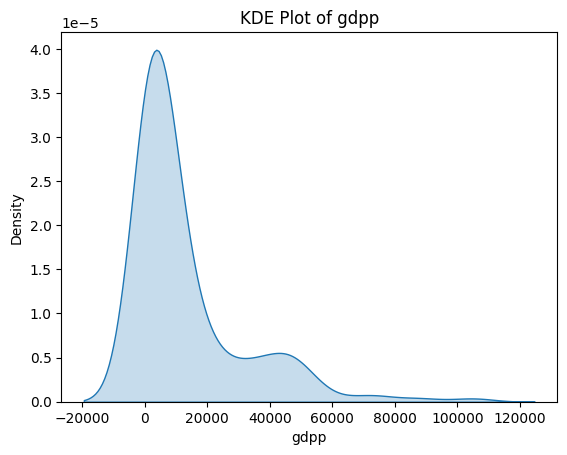

In [40]:
# List of variables to plot
variables = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create KDE plots for each variable
for var in variables:
    plt.figure()
    sns.kdeplot(df[var], shade=True)
    plt.title(f'KDE Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()


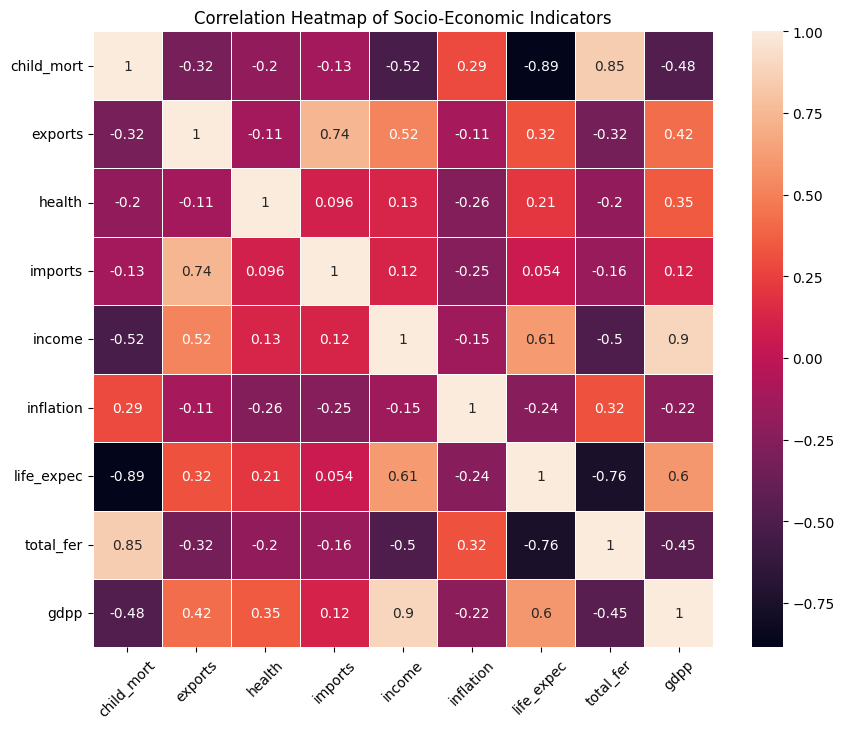

In [41]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap of Socio-Economic Indicators')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

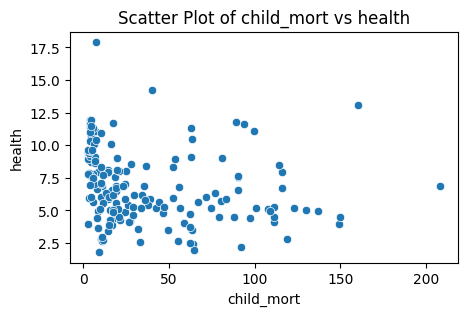

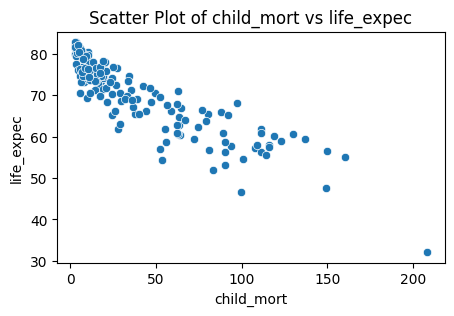

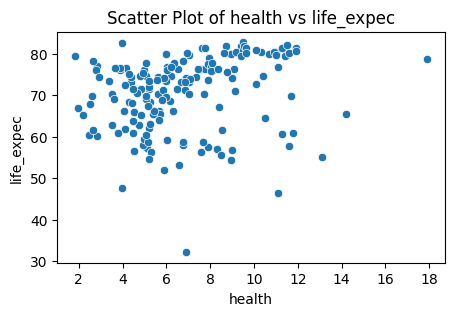

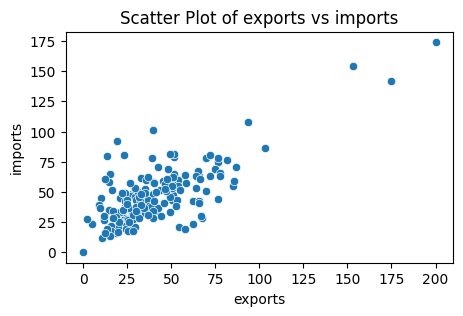

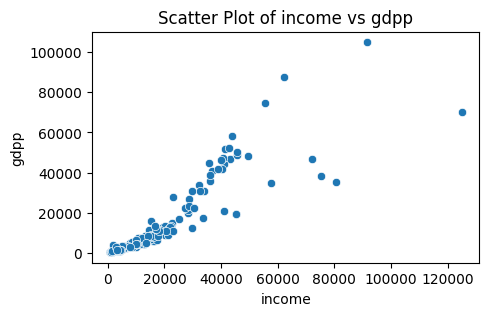

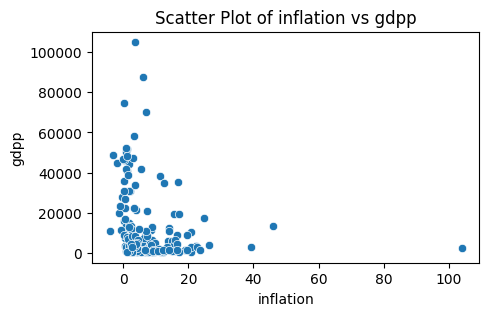

In [42]:
pairs = [
    ('child_mort', 'health'),
    ('child_mort', 'life_expec'),
    ('health', 'life_expec'),
    ('exports', 'imports'),
    ('income', 'gdpp'),
    ('inflation', 'gdpp')
]

# Create scatter plots for each pair of variables
for x, y in pairs:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

#### Health Spending and Life Expectancy

In [43]:

from scipy import stats

# Define a threshold for high vs. low health spending
threshold = df['health'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the health spending threshold
high_health_spending = df[df['health'] > threshold]['life_expec']
low_health_spending = df[df['health'] <= threshold]['life_expec']

# Conduct a t-test to compare the means of life expectancy
t_stat, p_value = stats.ttest_ind(high_health_spending, low_health_spending)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in life expectancy between countries with high and low health spending.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in life expectancy between countries with high and low health spending.")


T-statistic: 2.934
P-value: 0.004
Reject the null hypothesis: There is a significant difference in life expectancy between countries with high and low health spending.


#### Fertility and Development:

Correlation coefficient between Total_fertility and Income: -0.502


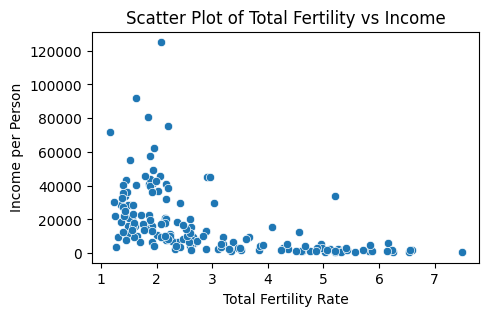

In [44]:
# Calculate the correlation coefficient
correlation = df['total_fer'].corr(df['income'])
print(f"Correlation coefficient between Total_fertility and Income: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='total_fer', y='income')
plt.title('Scatter Plot of Total Fertility vs Income')
plt.xlabel('Total Fertility Rate')
plt.ylabel('Income per Person')
plt.show()

In [45]:
# Define a threshold for high vs. low fertility
threshold = df['total_fer'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the fertility threshold
high_fertility = df[df['total_fer'] > threshold]['income']
low_fertility = df[df['total_fer'] <= threshold]['income']

# Conduct a t-test to compare the means of income
t_stat, p_value = stats.ttest_ind(high_fertility, low_fertility)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in income between countries with high and low fertility rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in income between countries with high and low fertility rates.")


T-statistic: -8.085
P-value: 0.000
Reject the null hypothesis: There is a significant difference in income between countries with high and low fertility rates.


#### Income and Child Mortality:

Pearson correlation coefficient between Income and Child Mortality: -0.524


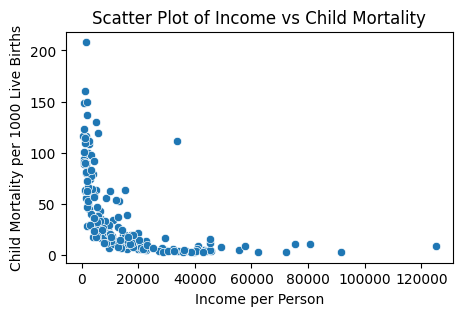

In [46]:
# Calculate the Pearson correlation coefficient
correlation = df['income'].corr(df['child_mort'])
print(f"Pearson correlation coefficient between Income and Child Mortality: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='income', y='child_mort')
plt.title('Scatter Plot of Income vs Child Mortality')
plt.xlabel('Income per Person')
plt.ylabel('Child Mortality per 1000 Live Births')
plt.show()


In [47]:


# Define a threshold for high vs. low income
threshold = df['income'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the income threshold
high_income = df[df['income'] > threshold]['child_mort']
low_income = df[df['income'] <= threshold]['child_mort']

# Conduct a t-test to compare the means of child mortality rates
t_stat, p_value = stats.ttest_ind(high_income, low_income)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in child mortality rates between countries with high and low income.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in child mortality rates between countries with high and low income.")


T-statistic: -10.186
P-value: 0.000
Reject the null hypothesis: There is a significant difference in child mortality rates between countries with high and low income.


#### Inflation and Economic Stability:

Pearson correlation coefficient between Inflation and GDP per capita: -0.222


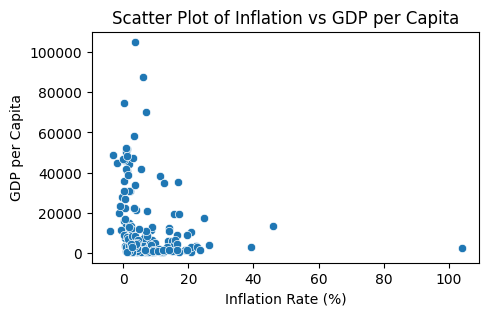

In [48]:

# Calculate the Pearson correlation coefficient
correlation = df['inflation'].corr(df['gdpp'])
print(f"Pearson correlation coefficient between Inflation and GDP per capita: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='inflation', y='gdpp')
plt.title('Scatter Plot of Inflation vs GDP per Capita')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP per Capita')
plt.show()


In [49]:


# Define a threshold for high vs. low inflation
threshold = df['inflation'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the inflation threshold
high_inflation = df[df['inflation'] > threshold]['gdpp']
low_inflation = df[df['inflation'] <= threshold]['gdpp']

# Conduct a t-test to compare the means of GDP per capita
t_stat, p_value = stats.ttest_ind(high_inflation, low_inflation)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in GDP per capita between countries with high and low inflation.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in GDP per capita between countries with high and low inflation.")


T-statistic: -3.688
P-value: 0.000
Reject the null hypothesis: There is a significant difference in GDP per capita between countries with high and low inflation.


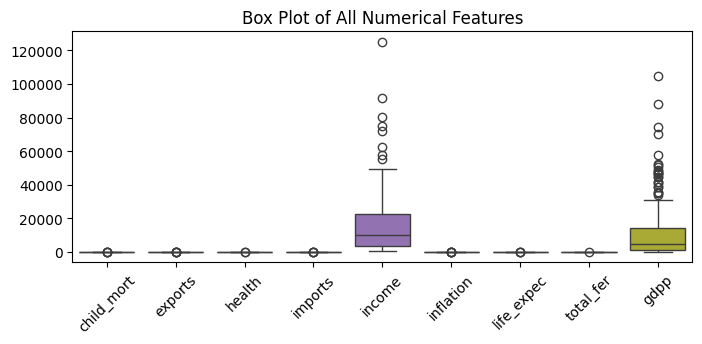

In [50]:
numeric_data = df.select_dtypes(include=['number'])

# Create a box plot for all numerical features
plt.figure(figsize=(8, 3))
sns.boxplot(data=numeric_data)
plt.title('Box Plot of All Numerical Features')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()